## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [1]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/valenciamelita/Dataset-DM/refs/heads/main/property_dataset.csv')
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [3]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [5]:
df.isnull().sum()

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [6]:
df.isnull().sum()/len(df)*100

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [7]:
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [8]:
df.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [9]:
df = df.drop('Nama Daerah', axis=1)
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [10]:
print(df['Area Category'].unique().tolist())  # ordinal
print(df['Arah Hadap Rumah'].unique().tolist()) # nominal
print(df['Posisi Rumah'].unique().tolist()) # nominal
print(df['Lebar Jalan Depan Rumah (ROW)'].unique().tolist()) # ordinal
print(df['Terjual/Belum'].unique().tolist()) # nominal


['Standard', 'Below Standard', 'Sangat Premium', 'Premium']
['Utara', 'Selatan', 'Barat', 'Timur']
['Standard', 'Cul De Sac/Ujung Gang Buntu', 'Tikungan/Hook', 'Kantong Belakang/Ngantong', 'Tusuk Sate']
['1-2 Mobil', '< 1 Mobil', '> 2 Mobil']
['Belum']


3.

In [11]:
le = LabelEncoder()
df['Arah Hadap Rumah'] = le.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = le.fit_transform(df['Posisi Rumah'])

df['Terjual/Belum']= df['Terjual/Belum'].map({'Belum': 1, 'Terjual': 0})
df['Area Category'] = df['Area Category'].map({'Sangat Premium': 1, 'Premium': 2, 'Standard': 3, 'Below Standard': 4})
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map({'< 1 Mobil': 1, '1-2 Mobil': 2, '> 2 Mobil': 3})
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [12]:
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].replace(' ', '10500000000')
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].replace(regex=r"^\d{1,3}(\.\d{3})+,\d{2}$")
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


check the data type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int64 
 9   Posisi Rumah                   308 non-null    int64 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [14]:
df['Luas Tanah (m2)'] = df['Luas Tanah (m2)'].astype(int)
df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].astype(int)
df['Jumlah Kamar'] = df['Jumlah Kamar'].astype(int)
df['Jumlah Kamar Mandi'] = df['Jumlah Kamar Mandi'].astype(int)
df['Tingkat/Lantai '] = df['Tingkat/Lantai '].astype(int)
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [16]:
# scaling data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.598758
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,-2.406773
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.598758
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.598758
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.598758


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

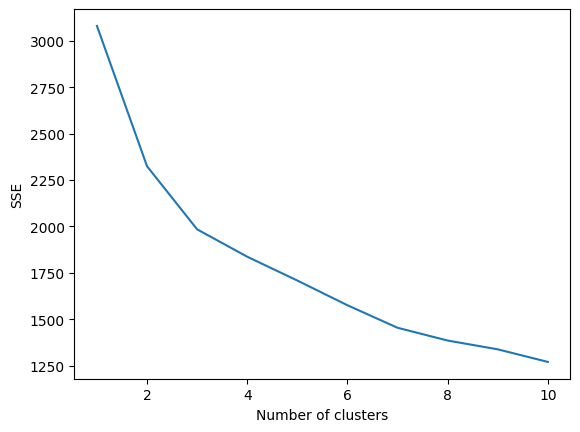

In [17]:
# set the parameter for evaluating K
sse=[]
# check the inertia for each K
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',max_iter=300,random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [18]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11),sse,S=1.0,curve='convex',direction='decreasing')
print("The best k for you model is", kneedle.elbow)


The best k for you model is 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [19]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)


In [20]:
# Inverse transform the scaled data to get the original values
dfinverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
dfinverse['KMeans'] = y_pred
dfinverse.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [21]:
# aggregation

# Lakukan agregasi
cluster_summary = dfinverse.groupby('KMeans').agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)':  ['mean', 'std', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

# Transpose agar hasilnya menjadi vertikal (baris) dan klaster menjadi kolom
cluster_summary = cluster_summary.T

# Ubah nama klaster menjadi 'Cluster 0', 'Cluster 1', dll.
cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]
cluster_summary.columns.name = 'KMeans'

# Menampilkan hasil
cluster_summary

KMeans                                      Cluster 0           Cluster 1  \
Area Category                 mode                2.0                 1.0   
                              min                 1.0                 1.0   
                              max                 4.0                 4.0   
Luas Tanah (m2)               mean         187.378205              570.68   
                              std           92.345448           248.58731   
                              min                50.0               240.0   
                              max               525.0              1561.0   
Luas Bangunan (m2)            mean         243.814103              642.22   
                              std          104.846912          212.154862   
                              min                75.0               350.0   
                              max               600.0              1200.0   
Jumlah Kamar                  mode                4.0                 5.0   
                              min                 3.0                 3.0   
                              max                 9.0                13.0   
Jumlah Kamar Mandi            mode                4.0                 5.0   
                              min                 1.0                 2.0   
                              max                 7.0                13.0   
Tingkat/Lantai                mode                2.0                 2.0   
                              min                 1.0                 1.0   
                              max                 3.0                 4.0   
Harga Penawaran (dari Owner)  mean  3544236467.205128  16756299779.959999   
                              std   2373718177.796998  15402514815.302958   
                              min         645000000.0        2750000000.0   
                              max       19500000000.0       99000000000.0   
Terjual/Belum                 mode                1.0                 1.0   
Arah Hadap Rumah              mode                3.0                 3.0   
Posisi Rumah                  mode                2.0                 2.0   
Lebar Jalan Depan Rumah (ROW) mode                2.0                 3.0   

KMeans                                      Cluster 2  
Area Category                 mode                3.0  
                              min                 2.0  
                              max                 4.0  
Luas Tanah (m2)               mean         118.980392  
                              std            89.77728  
                              min                14.0  
                              max               495.0  
Luas Bangunan (m2)            mean         117.588235  
                              std           79.584111  
                              min                14.0  
                              max               495.0  
Jumlah Kamar                  mode                2.0  
                              min                 1.0  
                              max                 5.0  
Jumlah Kamar Mandi            mode                2.0  
                              min                 1.0  
                              max                 4.0  
Tingkat/Lantai                mode         [1.0, 2.0]  
                              min                 1.0  
                              max                 2.0  
Harga Penawaran (dari Owner)  mean  1506754456.117647  
                              std   1488571767.630064  
                              min         160000000.0  
                              max       10500000000.0  
Terjual/Belum                 mode                1.0  
Arah Hadap Rumah              mode                3.0  
Posisi Rumah                  mode                2.0  
Lebar Jalan Depan Rumah (ROW) mode                2.0

In [22]:
# count data from each cluster
cluster_counts = dfinverse['KMeans'].value_counts().sort_index()
cluster_counts.name = 'KMeans'
cluster_counts

,KMeans
KMeans,
0,156
1,50
2,102


In [23]:
# write down your interpretation from the cluster that you have been made
# Interpretation of clusters based on summary statistics

# Cluster 0:
# - Area Category: Mostly in category 2, with a range from 1 to 4.
# - Land Area (Luas Tanah): Moderate average size of ~187.4 m², ranging from 50 m² to 525 m².
# - Building Area (Luas Bangunan): Medium-sized with an average of ~243.8 m², ranging from 75 m² to 600 m².
# - Number of Rooms (Jumlah Kamar): Most properties have 4 rooms, with a range of 3 to 9 rooms.
# - Number of Bathrooms (Jumlah Kamar Mandi): Most properties have 4 bathrooms, ranging from 1 to 7.
# - Floors (Tingkat/Lantai): Typically 2 floors, with some having 1 to 3 floors.
# - Listing Price (Harga Penawaran): Moderate pricing with an average of ~3.5 billion IDR, but high variability, from 645 million to 19.5 billion IDR.
# - Sold/Available (Terjual/Belum): Mostly marked as "1", possibly indicating availability.
# - House Direction (Arah Hadap Rumah) & Position (Posisi Rumah): Mostly face direction 3, with position code 2.
# - Road Width (Lebar Jalan Depan Rumah): Most properties have road width mode of 2, indicating narrow to medium-width roads.

# Interpretation for Cluster 0:
# Cluster 0 represents mid-range properties with moderate land and building sizes, medium pricing,
# and likely located in suburban or mid-density urban areas with moderately narrow access roads.

# Cluster 1:
# - Area Category: Predominantly in category 1, with a range from 1 to 4.
# - Land Area (Luas Tanah): Significantly larger properties with an average of ~570.7 m², ranging from 240 m² to 1561 m².
# - Building Area (Luas Bangunan): Large, with an average of ~642.2 m², ranging from 350 m² to 1200 m².
# - Number of Rooms (Jumlah Kamar): Most properties have 5 rooms, with a range from 3 to 13 rooms.
# - Number of Bathrooms (Jumlah Kamar Mandi): Mode is 5 bathrooms, with a range from 2 to 13.
# - Floors (Tingkat/Lantai): Average of 2 floors, with some properties having up to 4 floors.
# - Listing Price (Harga Penawaran): High-end, with an average price around 16.75 billion IDR, high variability, ranging from 2.75 billion to 99 billion IDR.
# - Sold/Available (Terjual/Belum): Mostly marked as "1".
# - House Direction (Arah Hadap Rumah) & Position (Posisi Rumah): Mostly face direction 3, with position code 2.
# - Road Width (Lebar Jalan Depan Rumah): Mode is 3, indicating wide access roads.

# Interpretation for Cluster 1:
# Cluster 1 represents high-end, large properties with spacious land/building areas, many rooms,
# and premium prices, suited for affluent buyers in upscale neighborhoods with wide access roads.

# Cluster 2:
# - Area Category: Mostly in category 3, with a range from 2 to 4.
# - Land Area (Luas Tanah): Smaller properties with an average of ~119 m², ranging from 14 m² to 495 m².
# - Building Area (Luas Bangunan): Smallest building area with an average of ~117.6 m², ranging from 14 m² to 495 m².
# - Number of Rooms (Jumlah Kamar): Mode is 2, ranging from 1 to 5 rooms.
# - Number of Bathrooms (Jumlah Kamar Mandi): Mode is 2, ranging from 1 to 4.
# - Floors (Tingkat/Lantai): Floors vary between 1 and 2, with a mix of one- and two-story buildings.
# - Listing Price (Harga Penawaran): Lowest among clusters, averaging ~1.5 billion IDR, with a range from 160 million to 10.5 billion IDR.
# - Sold/Available (Terjual/Belum): Mostly marked as "1".
# - House Direction (Arah Hadap Rumah) & Position (Posisi Rumah): Mostly face direction 3, with position code 2.
# - Road Width (Lebar Jalan Depan Rumah): Mode is 2, indicating narrow access roads.

# Interpretation for Cluster 2:
# Cluster 2 represents more affordable, smaller properties with lower prices, aimed at budget-conscious buyers
# in densely populated areas with narrow access roads, possibly compact urban or suburban settings.

# Summary:
# - Cluster 0: Mid-range properties with moderate land/building sizes and prices, suited for middle-income buyers.
# - Cluster 1: High-end properties with large land and building areas, many rooms, and premium prices, suited for affluent buyers.
# - Cluster 2: Budget-friendly, smaller properties with low prices, aimed at budget-conscious buyers in compact areas.



## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

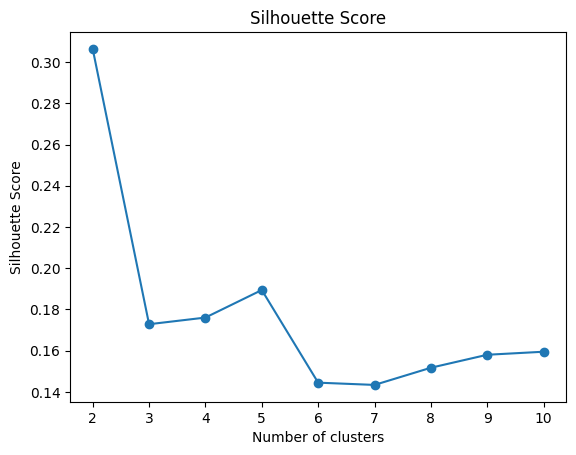

In [24]:
# The image below is not the final result, if yours looks different, that’s okay.
silhouette_scores = []
for i in range(2, 11):
    hierarchical = fcluster(linkage(df_scaled, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_scaled, hierarchical)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [25]:
# agglomerative clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled)

In [26]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
dfinverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
dfinverse['KMeans'] = y_pred
dfinverse['Agglo'] = y_hc

# show the df
dfinverse.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,Agglo
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0,1
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0,0


Display the cluster summary in the form of a dataframe.

In [27]:
# Lakukan agregasi
cluster_summary = dfinverse.groupby('Agglo').agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)':  ['mean', 'std', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max'],
})

# Menampilkan hasil
cluster_summary

Area Category           Luas Tanah (m2)                             \
               mode  min  max            mean         std    min     max   
Agglo                                                                      
0               2.0  1.0  4.0      511.848485  244.704987  170.0  1561.0   
1               2.0  1.0  4.0      163.090361   81.519198   34.0   450.0   
2               3.0  2.0  4.0      119.026316   89.201640   14.0   420.0   

      Luas Bangunan (m2)                            Jumlah Kamar             \
                    mean         std    min     max         mode  min   max   
Agglo                                                                         
0             572.484848  229.526083  120.0  1200.0          5.0  3.0  13.0   
1             218.156627  100.404996   50.0   600.0          4.0  2.0   8.0   
2             107.131579   69.677608   14.0   300.0          2.0  1.0   5.0   

      Jumlah Kamar Mandi            Tingkat/Lantai             
                    mode  min   max            mode  min  max  
Agglo                                                          
0                    5.0  2.0  13.0             2.0  1.0  4.0  
1                    4.0  1.0   7.0             2.0  1.0  3.0  
2                    1.0  1.0   4.0             1.0  1.0  2.0

In [28]:
# Lakukan agregasi
cluster_summary = dfinverse.groupby('Agglo').agg({
    'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

# Menampilkan hasil
cluster_summary

Harga Penawaran (dari Owner)                                           \
                              mean           std          min           max   
Agglo                                                                         
0                     1.383303e+10  1.448072e+10  325000000.0  9.900000e+10   
1                     3.094804e+09  2.060152e+09  645000000.0  1.450000e+10   
2                     1.548517e+09  1.712632e+09  160000000.0  1.050000e+10   

      Terjual/Belum Arah Hadap Rumah Posisi Rumah  \
               mode             mode         mode   
Agglo                                               
0               1.0              3.0          2.0   
1               1.0              3.0          2.0   
2               1.0              3.0          2.0   

      Lebar Jalan Depan Rumah (ROW)  
                               mode  
Agglo                                
0                               2.0  
1                               2.0  
2                               2.0

In [29]:
# Menghitung jumlah data di setiap klaster
cluster_counts = dfinverse['Agglo'].value_counts().sort_index()
cluster_counts.name = 'Agglo'
cluster_counts

,Agglo
Agglo,
0,66
1,166
2,76


In [30]:
# write down your interpretation from the cluster that you have been made

# Interpretation of clusters based on summary statistics from the Agglomerative Clustering (Agglo)

# Cluster 0:
# - Area Category: Most properties are in category 2, with a range between 1 and 4.
# - Land Area (Luas Tanah): High average land area (~511.8 m²), indicating larger properties, with land sizes ranging from 170 m² to 1561 m².
# - Building Area (Luas Bangunan): Large average building area (~572.5 m²), ranging from 120 m² to 1200 m².
# - Number of Rooms (Jumlah Kamar): Most properties have 5 rooms, with a range between 3 and 13 rooms.
# - Number of Bathrooms (Jumlah Kamar Mandi): Most properties have 5 bathrooms, ranging from 2 to 13.
# - Floors (Tingkat/Lantai): Most properties have 2 floors, with a range of 1 to 4 floors.
# - Listing Price (Harga Penawaran): High average listing price (~13.8 billion IDR) with significant variability (std ~14.5 billion IDR), ranging from 325 million to 99 billion IDR.
# - Sold/Available (Terjual/Belum): Mostly marked as "1", possibly indicating availability.
# - House Direction (Arah Hadap Rumah) & Position (Posisi Rumah): Mostly face direction 3, with position code 2.
# - Road Width (Lebar Jalan Depan Rumah): Mode is 2, indicating narrow to medium-width roads.
# - Count: Cluster 0 contains 66 properties.

# Interpretation for Cluster 0:
# Cluster 0 represents high-end, large properties with extensive land and building areas, many rooms, and high prices,
# likely suited for affluent buyers in premium locations, but with moderately narrow access roads.

# Cluster 1:
# - Area Category: Most properties fall in category 2, with a range between 1 and 4.
# - Land Area (Luas Tanah): Moderate average land area (~163.1 m²), with sizes ranging from 34 m² to 450 m².
# - Building Area (Luas Bangunan): Moderate building area (~218.2 m²) with a range from 50 m² to 600 m².
# - Number of Rooms (Jumlah Kamar): Mode of 4 rooms, with a range from 2 to 8 rooms.
# - Number of Bathrooms (Jumlah Kamar Mandi): Mode of 4 bathrooms, with a range from 1 to 7.
# - Floors (Tingkat/Lantai): Typically 2 floors, with a range from 1 to 3 floors.
# - Listing Price (Harga Penawaran): Moderate average price (~3.1 billion IDR) with a range from 645 million to 14.5 billion IDR.
# - Sold/Available (Terjual/Belum): Mostly marked as "1".
# - House Direction (Arah Hadap Rumah) & Position (Posisi Rumah): Mostly face direction 3, with position code 2.
# - Road Width (Lebar Jalan Depan Rumah): Mode is 2, indicating moderately narrow access roads.
# - Count: Cluster 1 contains 166 properties.

# Interpretation for Cluster 1:
# Cluster 1 represents mid-range properties with moderate land/building sizes, moderate pricing,
# and a layout that is suitable for middle-income buyers, likely located in suburban or mid-density urban areas.

# Cluster 2:
# - Area Category: Most properties are in category 3, with a range between 2 and 4.
# - Land Area (Luas Tanah): Smallest average land area (~119 m²), with a range from 14 m² to 420 m².
# - Building Area (Luas Bangunan): Small average building area (~107.1 m²) ranging from 14 m² to 300 m².
# - Number of Rooms (Jumlah Kamar): Mode of 2 rooms, with a range from 1 to 5 rooms.
# - Number of Bathrooms (Jumlah Kamar Mandi): Mode of 1 bathroom, ranging from 1 to 4.
# - Floors (Tingkat/Lantai): Most properties have 1 floor, with a range between 1 and 2 floors.
# - Listing Price (Harga Penawaran): Lowest average price (~1.55 billion IDR) with a range from 160 million to 10.5 billion IDR.
# - Sold/Available (Terjual/Belum): Mostly marked as "1".
# - House Direction (Arah Hadap Rumah) & Position (Posisi Rumah): Mostly face direction 3, with position code 2.
# - Road Width (Lebar Jalan Depan Rumah): Mode is 2, indicating narrow access roads.
# - Count: Cluster 2 contains 76 properties.

# Interpretation for Cluster 2:
# Cluster 2 represents more affordable, smaller properties with low prices, suitable for budget-conscious buyers in densely populated or urban settings,
# likely located in compact neighborhoods with narrow access roads.

# Summary:
# - Cluster 0: High-end, large properties with high prices, suitable for affluent buyers in premium areas.
# - Cluster 1: Mid-range properties with moderate land and building sizes, aimed at middle-income buyers in suburban or mid-density areas.
# - Cluster 2: Budget-friendly, smaller properties with lower prices, suitable for buyers with limited budgets in compact, high-density areas.


**Hierarchical Visualization**

Single Linkage

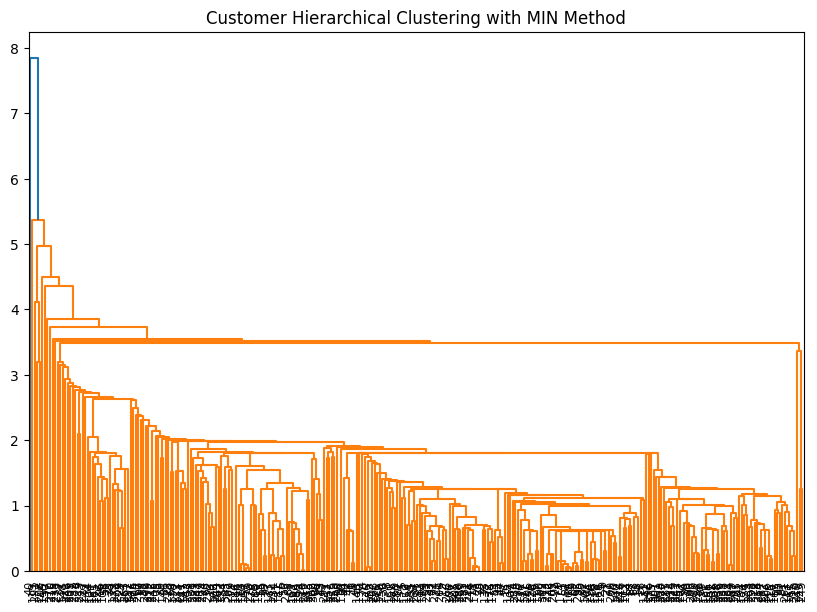

In [31]:

Z = linkage(df_scaled, method='single', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Customer Hierarchical Clustering with MIN Method')
plt.show()


complete linkage

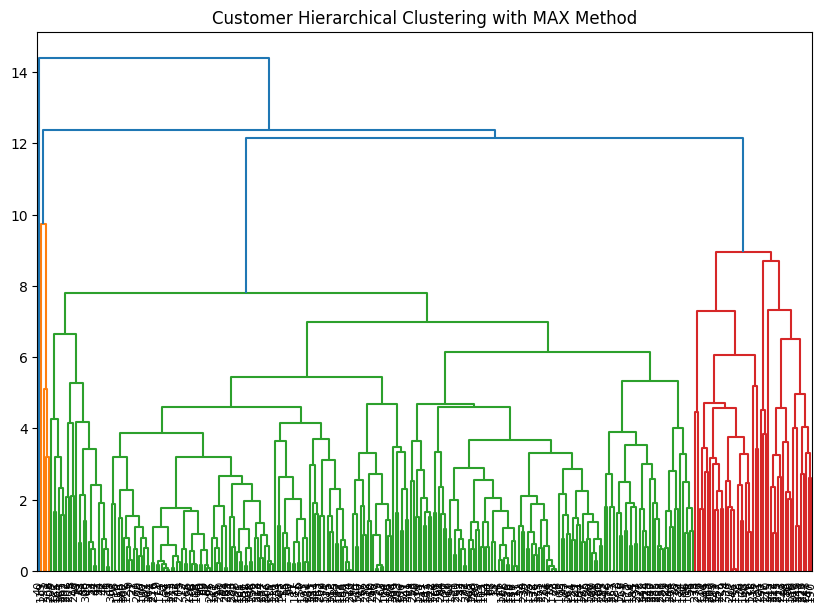

In [32]:
# Complete Linkage with MAX Method
Z = linkage(df_scaled, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Customer Hierarchical Clustering with MAX Method')
plt.show()

average linkage

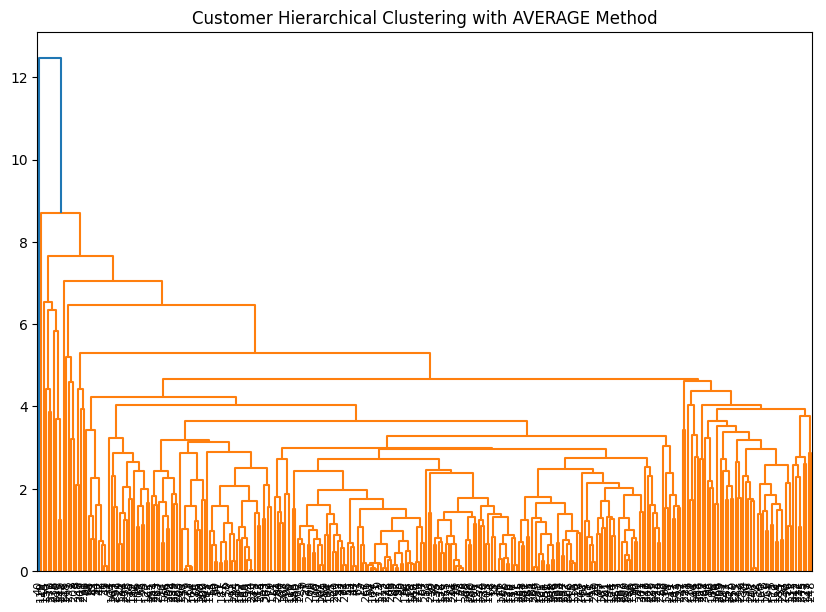

In [33]:
Z = linkage(df_scaled, method='average', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Customer Hierarchical Clustering with AVERAGE Method')
plt.show()

ward method

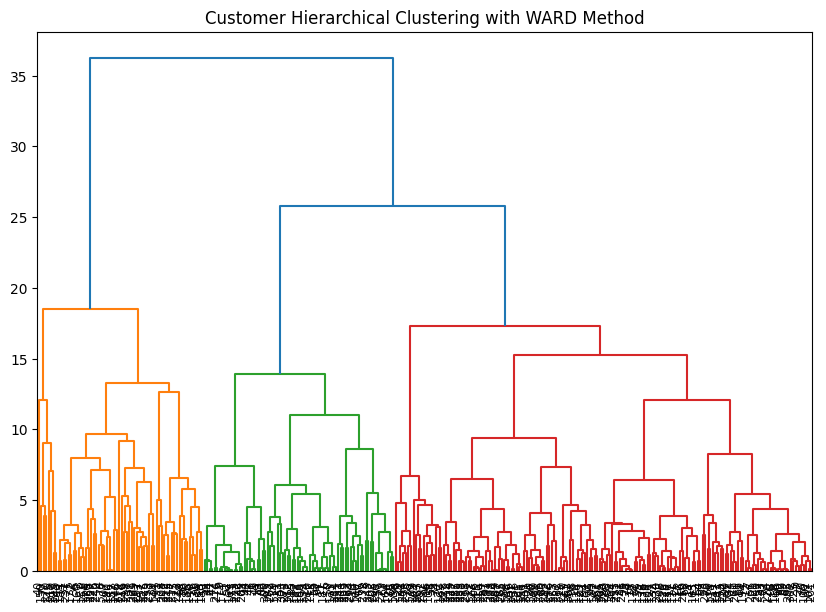

In [34]:
Z = linkage(df_scaled, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Customer Hierarchical Clustering with WARD Method')
plt.show()